In [1]:
# Import important libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
train = pd.read_csv("Housing_dataset_train.csv")
test = pd.read_csv("Housing_dataset_test.csv")
submission = pd.read_csv("Sample_submission.csv")

In [3]:
#brief overview of the datasets
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             6000 non-null   int64 
 1   loc            6000 non-null   object
 2   title          6000 non-null   object
 3   bedroom        6000 non-null   int64 
 4   bathroom       6000 non-null   int64 
 5   parking_space  6000 

(None, None)

In [4]:
#dropping the ID columns since the ID is unique and it might affect the model
train.drop("ID", axis = 1, inplace = True)
test.drop("ID", axis = 1, inplace = True)

# Filling Missing Values

In [5]:
#the missing values for bedroom, bathroom and parking_space were filled
train['bedroom'].fillna(train['bedroom'].std(), inplace=True) #filled with the standard deviation
train['bathroom'].fillna(train['bathroom'].std(), inplace=True) #filled with the standard deviation
train['parking_space'].fillna(0, inplace=True) #filled with 0 to assume there is no parking space

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   loc            12187 non-null  object 
 1   title          12278 non-null  object 
 2   bedroom        14000 non-null  float64
 3   bathroom       14000 non-null  float64
 4   parking_space  14000 non-null  float64
 5   price          14000 non-null  float64
dtypes: float64(4), object(2)
memory usage: 656.4+ KB


In [7]:
#missing values for title and loc were not filled as assumed values might be outrightly wrong
train = train.dropna()

In [8]:
train.shape

(10531, 6)

# Encoding Categorical Variables

In [9]:
#using Label Encoder for the title feature
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train['title_enc'] = le.fit_transform(train['title'])
test['title_enc'] = le.fit_transform(test['title'])

In [10]:
#this method was used to avoid the ordinal issues that might affect the loc feature
loc_enc_train = pd.get_dummies(train['loc'], prefix = "loc")
loc_enc_test = pd.get_dummies(test['loc'], prefix = "loc")

In [11]:
#encoded values were concated to the datasets
train = pd.concat([train, loc_enc_train], axis=1)
test = pd.concat([test, loc_enc_test], axis=1)

In [12]:
#unencoded fetures were dropped
train.drop(['title', 'loc'], axis=1, inplace=True)
test.drop(['title', 'loc'], axis=1, inplace=True)

In [13]:
#statistical distribution of the dataset
train.describe()

,bedroom,bathroom,parking_space,price,title_enc,loc_Abia,loc_Adamawa,loc_Akwa Ibom,loc_Anambra,loc_Bauchi,...,loc_Ogun,loc_Ondo,loc_Osun,loc_Oyo,loc_Plateau,loc_Rivers,loc_Sokoto,loc_Taraba,loc_Yobe,loc_Zamfara
count,10531.000000,10531.000000,10531.000000,1.053100e+04,10531.000000,10531.000000,10531.000000,10531.000000,10531.000000,10531.000000,...,10531.000000,10531.000000,10531.000000,10531.000000,10531.000000,10531.000000,10531.000000,10531.000000,10531.000000,10531.000000
mean,4.001705,2.957944,2.661855,2.127767e+06,4.666224,0.026208,0.027063,0.025923,0.029437,0.027348,...,0.028297,0.028487,0.027158,0.028582,0.028582,0.026398,0.027253,0.026683,0.029152,0.029152
std,2.335920,1.904269,1.868082,1.069676e+06,2.890857,0.159762,0.162275,0.158915,0.169036,0.163103,...,0.165829,0.166368,0.162551,0.166637,0.166637,0.160324,0.162827,0.161163,0.168241,0.168241
min,1.000000,1.000000,0.000000,4.319673e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.441165,2.000000,1.000000,1.391271e+06,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2.035950,3.000000,1.888006e+06,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,4.000000,2.571146e+06,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,7.000000,6.000000,1.656849e+07,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
train.head()

,bedroom,bathroom,parking_space,price,title_enc,loc_Abia,loc_Adamawa,loc_Akwa Ibom,loc_Anambra,loc_Bauchi,...,loc_Ogun,loc_Ondo,loc_Osun,loc_Oyo,loc_Plateau,loc_Rivers,loc_Sokoto,loc_Taraba,loc_Yobe,loc_Zamfara
0,2.000000,2.0,1.0,1149999.565,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.441165,2.0,4.0,1672416.689,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,5.000000,2.0,4.0,2410306.756,3,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2.441165,5.0,6.0,2600700.898,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.441165,1.0,3.0,1341750.867,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Modelling

In [15]:
#separating the dataset into dependent and independent features
X = train.drop('price', axis=1)
y = train.price

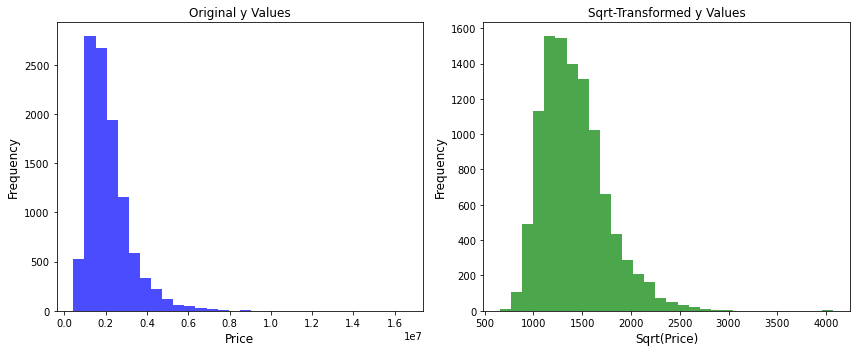

In [16]:
#Applying square root transformation to the y variable
y_sqrt = np.sqrt(y)

# Create subplots for the histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot the original y values
axes[0].hist(y, bins=30, color='blue', alpha=0.7)
axes[0].set_title('Original y Values')
axes[0].set_xlabel('Price', size = 12)
axes[0].set_ylabel('Frequency', size = 12)

# Plot the transformed y values
axes[1].hist(y_sqrt, bins=30, color='green', alpha=0.7)
axes[1].set_title('Sqrt-Transformed y Values')
axes[1].set_xlabel('Sqrt(Price)', size = 12)
axes[1].set_ylabel('Frequency', size = 12)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


# LIGHT GBM MODEL

In [17]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import lightgbm as lgb


kf = KFold(n_splits = 15, shuffle=True, random_state=42) #15
rmse_scores = []

# Iterate through the KFold splits
for train_index, test_index in kf.split(X):
    # Split the data into train and test sets based on the indices provided by KFold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_sqrt.iloc[train_index], y_sqrt.iloc[test_index]

    # Fit the model to the training data
    model_lgb = lgb.LGBMRegressor(random_state=42).fit(X_train, y_train)

    # Make predictions on the test data
    y_pred_sqrt = model_lgb.predict(X_test)
    predictions = model_lgb.predict(test)

    # Calculate evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, np.square(y_pred_sqrt)))

    # Append the metrics to the corresponding list
    rmse_scores.append(rmse)

# Calculate the average of the evaluation metrics
avg_rmse = np.mean(rmse_scores).round(3)

print("RMSE for LightGBM is:", avg_rmse)

# Reverse the log transformation on predictions
predictions = np.square(predictions)

RMSE for LightGBM is: 2317007.321


In [18]:
predictions

array([2362464.61658362, 1055328.98182496, 1273575.21767259, ...,
       1860918.81550122, 1393347.51464218, 3578168.90302191])

In [19]:
sub_file = submission.copy()
sub_file['price'] = predictions

sub_file.to_csv("lgb_sqrt.csv", index=False)

In [20]:
# Get feature importances
feature_importances = model_lgb.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df['Original_Column'] = feature_importance_df['Feature'].str.split('_').str[0]
grouped_importance = feature_importance_df.groupby('Original_Column')['Importance'].mean().round(2).reset_index()

# Sort the DataFrame by importance scores in descending order
grouped_importance = grouped_importance.sort_values('Importance', ascending=False)

# Print the sorted feature importance
print(grouped_importance)

  Original_Column  Importance
4           title       588.0
1         bedroom       490.0
0        bathroom       325.0
3         parking       229.0
2             loc        38.0


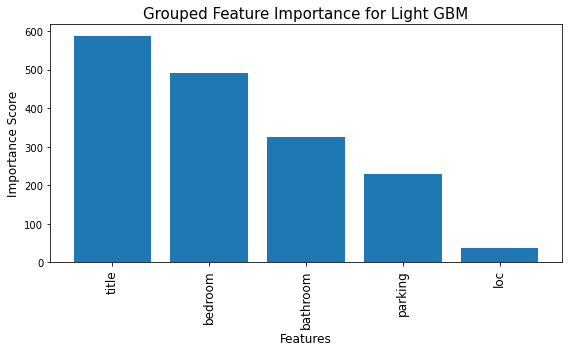

In [21]:
#Plotting the Feature Importance
plt.figure(figsize=(8, 5))
plt.bar(grouped_importance['Original_Column'], grouped_importance['Importance'])
plt.xticks(rotation=90, ha='center', size = 12)
plt.xlabel('Features', size = 12)
plt.ylabel('Importance Score', size = 12)
plt.title('Grouped Feature Importance for Light GBM', size = 15)
plt.tight_layout()
plt.savefig("Grouped Feature Importance for Light GBM.png")
plt.show()

CATBOOST MODEL

In [22]:
from sklearn.model_selection import KFold
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error


kf = KFold(n_splits = 15, shuffle=True, random_state=42) #15
rmse_scores = []

# Iterate through the KFold splits
for train_index, test_index in kf.split(X):
    # Split the data into train and test sets based on the indices provided by KFold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_sqrt.iloc[train_index], y_sqrt.iloc[test_index]

    # Fit the model to the training data
    model_cat = CatBoostRegressor(random_state=42, silent=True).fit(X_train, y_train)

    # Make predictions on the test data
    y_pred_sqrt = model_cat.predict(X_test)
    predictions = model_cat.predict(test)

    # Calculate evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, np.square(y_pred_sqrt)))

    # Append the metrics to the corresponding list
    rmse_scores.append(rmse)

# Calculate the average of the evaluation metrics
avg_rmse = np.mean(rmse_scores).round(3)

print("RMSE for CatBoost is:", avg_rmse)

# Reverse the log transformation on predictions
predictions = np.square(predictions)

RMSE for CatBoost is: 2323551.498


In [23]:
# Get feature importances
feature_importances = model_cat.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df['Original_Column'] = feature_importance_df['Feature'].str.split('_').str[0]
grouped_importance = feature_importance_df.groupby('Original_Column')['Importance'].mean().round(2).reset_index()

# Sort the DataFrame by importance scores in descending order
grouped_importance = grouped_importance.sort_values('Importance', ascending=False)

# Print the sorted feature importance
print(grouped_importance)

  Original_Column  Importance
4           title       47.48
1         bedroom       23.90
0        bathroom        3.84
3         parking        1.73
2             loc        0.64


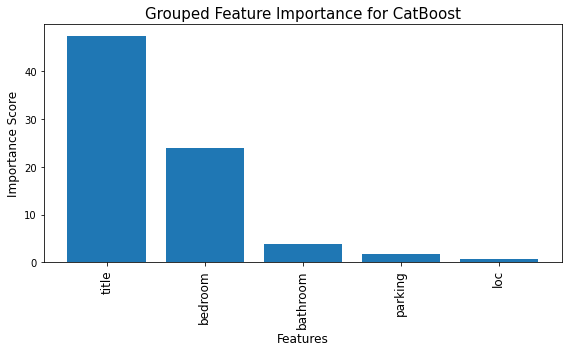

In [24]:
#Plotting the Feature Importance
plt.figure(figsize=(8, 5))
plt.bar(grouped_importance['Original_Column'], grouped_importance['Importance'])
plt.xticks(rotation=90, ha='center', size = 12)
plt.xlabel('Features', size = 12)
plt.ylabel('Importance Score', size = 12)
plt.title('Grouped Feature Importance for CatBoost', size = 15)
plt.tight_layout()
plt.savefig("Grouped Feature Importance for CatBoost.png")
plt.show()

In [25]:
sub_file = submission.copy()
sub_file['price'] = predictions

sub_file.to_csv("cat_sqrt.csv", index=False)

BLENDING OF THE MODELS

In [26]:
pred_1= pd.read_csv('cat_sqrt.csv')['price']
pred_2 = pd.read_csv('lgb_sqrt.csv')['price']

In [27]:
# THE catboost model was given a weight of 0.7 and the light gbm was given 0.3
sub_pred = (pred_1 * 0.7) + (pred_2 * 0.3) #0.7 and 0.3
sub_file['price'] = sub_pred
sub_file.to_csv('Blended_sqrt.csv', index = False)